
Testing size = 100
My Sort              → 0.00040 sec (avg over 5 runs)
Quick Sort (Random)  → 0.00000 sec (avg over 5 runs)
Quick Sort (Avg)     → 0.00020 sec (avg over 5 runs)
Merge Sort           → 0.00040 sec (avg over 5 runs)
Heap Sort            → 0.00040 sec (avg over 5 runs)

Testing size = 500
My Sort              → 0.01320 sec (avg over 5 runs)
Quick Sort (Random)  → 0.00100 sec (avg over 5 runs)
Quick Sort (Avg)     → 0.00140 sec (avg over 5 runs)
Merge Sort           → 0.00180 sec (avg over 5 runs)
Heap Sort            → 0.00180 sec (avg over 5 runs)

Testing size = 1000
My Sort              → 0.05800 sec (avg over 5 runs)
Quick Sort (Random)  → 0.00140 sec (avg over 5 runs)
Quick Sort (Avg)     → 0.00200 sec (avg over 5 runs)
Merge Sort           → 0.00260 sec (avg over 5 runs)
Heap Sort            → 0.00340 sec (avg over 5 runs)

Testing size = 2000
My Sort              → 0.18280 sec (avg over 5 runs)
Quick Sort (Random)  → 0.00460 sec (avg over 5 runs)
Quick Sort (Avg) 

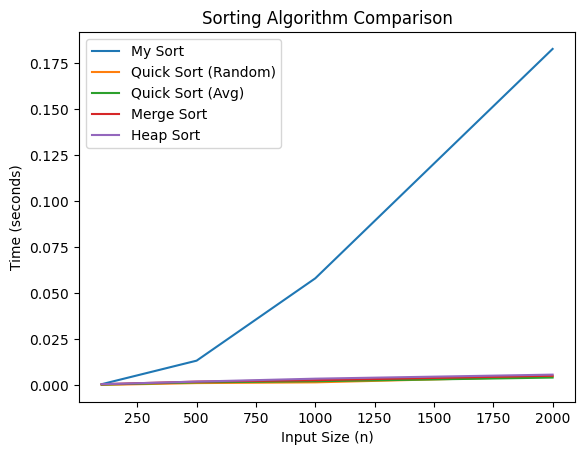

In [7]:
import random
import time
import matplotlib.pyplot as plt

def my_sort(arr):
    for i in range(len(arr)):
        for j in range(i + 1, len(arr)):
            if arr[i] > arr[j]:
                arr[i], arr[j] = arr[j], arr[i]
    return arr

def quick_sort_random(arr):
    if len(arr) <= 1:
        return arr

    pivot = random.choice(arr)
    left = []
    mid = []
    right = []

    for x in arr:
        if x < pivot:
            left.append(x)
        elif x == pivot:
            mid.append(x)
        else:
            right.append(x)


    return quick_sort_random(left) + mid + quick_sort_random(right)
    
def quick_sort_avg(arr):
    if len(arr) <= 1:
        return arr


    pivot = (arr[0] + arr[len(arr)//2] + arr[-1]) / 3
    left = []
    mid = []
    right = []

    for x in arr:
        if x < pivot:
            left.append(x)
        elif x == pivot:
            mid.append(x)
        else:
            right.append(x)

    return quick_sort_avg(left) + mid + quick_sort_avg(right)
    
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    res, i, j = [], 0, 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            res.append(left[i]); i += 1
        else:
            res.append(right[j]); j += 1
    return res + left[i:] + right[j:]


def heapify(arr, n, i):
    largest = i
    l, r = 2*i+1, 2*i+2
    if l < n and arr[l] > arr[largest]:
        largest = l
    if r < n and arr[r] > arr[largest]:
        largest = r
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)
    for i in range(n//2 - 1, -1, -1):
        heapify(arr, n, i)
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)
    return arr

def test_algorithms():
    sizes = [100, 500, 1000, 2000]
    iterations = 5
    algos = {
        "My Sort": my_sort,
        "Quick Sort (Random)": quick_sort_random,
        "Quick Sort (Avg)": quick_sort_avg,
        "Merge Sort": merge_sort,
        "Heap Sort": heap_sort
    }

    times = {name: [] for name in algos}

    for n in sizes:
        print(f"\nTesting size = {n}")
        for name, func in algos.items():
            total_time = 0
            for _ in range(iterations):
                data = [random.randint(0, 10000) for _ in range(n)]
                start = time.time()
                func(data)
                end = time.time()
                total_time += (end - start)
            avg_time = total_time / iterations
            times[name].append(avg_time)
            print(f"{name:20s} → {avg_time:.5f} sec (avg over {iterations} runs)")

    for name in algos:
        plt.plot(sizes, times[name], label=name)
    plt.xlabel("Input Size (n)")
    plt.ylabel("Time (seconds)")
    plt.title("Sorting Algorithm Comparison")
    plt.legend()
    plt.show()

test_algorithms()



Quick Sort — average case

Recurrence (balanced splits on average):T(n)=2T(2n​)+Θ(n)
Master Theorem: a=2, b=2, f(n)=Θ(n).
nlogb​a=nlog2​2=n⇒f(n)=Θ(nlogb​a)
T(n)=Θ(nlogn)
Space (recursion depth):Θ(logn)

Quick Sort — worst case

Pivot always smallest/largest:
T(n)=T(n−1)+Θ(n)⇒T(n)=Θ(n2)
Space:Θ(n) call depth in worst case.

Heap Sort

Two phases:
Build-heap in place (bottom-up):O(n)
Repeatedly extract-max + heapify: n times x O(logn) = O(nlogn)
T(n) = O(nlogn), Space = O(1)

My Sort(bubble) 

T(n) = O(n^2), Space = Θ(1)

| Algorithm                       |      Average Time |        Worst Time |      Extra Space | Notes / Recurrence                           |
| ------------------------------- | ----------------: | ----------------: | ---------------: | -------------------------------------------- |
| My alg (O(n^2)) (Bubble-like)   |      Θ(n^2)       |     Θ(n^2)        |      Θ(1)        | Double loop                                  |
| Quick Sort (random / avg pivot) | Θ(n\log n)        |     Θ(n^2)        | Θ(\log n)        | (T(n)=2T(n/2)+Θ(n)) (avg)                    |
| Quick Sort (avg-of-3 pivot)*    | Θ(n\log n)        |     Θ(n^2)        | Θ(\log n)        | Same recurrence; better constants on average |
| Merge Sort                      | Θ(n\log n)        | Θ(n\log n)        |      Θ(n)        | (T(n)=2T(n/2)+Θ(n))                          |
| Heap Sort                       | Θ(n\log n)        | Θ(n\log n)        |      Θ(1)        | Build Θ(n) + (n*Θ(\log n))                   |
